# Import data and preprocessing

### Set paths based on colab or local

In [ ]:
try:
  from google.colab import drive
  IN_COLAB = True
except:
  IN_COLAB = False

if (IN_COLAB):
    drive.mount('/content/drive')
    import sys
    sys.path.append("/content/drive/My Drive/nlp2020-hw2-master/hw2")

    
train_path = "../data/train.json"
dev_path = "../data/dev.json"
test_path = "../data/test.json"

words_vocabulary_path = "../model/words_vocabulary.pt"
pos_tags_vocabulary_path = "../model/pos_tags_vocabulary.pt"
lemmas_vocabulary_path = "../model/lemmas_vocabulary.pt"
roles_vocabulary_path = "../model/roles_vocabulary.pt"


model_path = "../model/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Install requirements and import modules

In [ ]:
pip install -r "/content/drive/My Drive/nlp2020-hw2-master/requirements.txt"

     |████████████████████████████████| 102kB 4.1MB/s 
     |████████████████████████████████| 7.1MB 14.2MB/s 
     |████████████████████████████████| 20.2MB 1.2MB/s 
     |████████████████████████████████| 61kB 4.4MB/s 
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.5MB 15.6MB/s 
     |████████████████████████████████| 10.0MB 51.8MB/s 
     |████████████████████████████████| 225kB 54.2MB/s 
     |████████████████████████████████| 1.1MB 51.3MB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.4.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2
  Found existing installation: numpy 1.18.

In [ ]:
!pip install transformers --upgrade

     |████████████████████████████████| 890kB 4.5MB/s 
     |████████████████████████████████| 890kB 13.0MB/s 
     |████████████████████████████████| 3.0MB 28.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=5fcc2f497aca3d0d1854620fa4bfe44745018b237d06f243a9a1ebd3205638fd
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
%cd "/content/drive/My Drive/nlp2020-hw2-master/hw2"

/content/drive/My Drive/nlp2020-hw2-master/hw2


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

from stud.my_model import *
from stud.preprocessing import *
from stud.train import Trainer
from stud.prediction import *

sys.path.append("../")
from utils import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Create the dataset for ytorch

### Import data

In [ ]:
# From each dataset(path) we are going to create a list[list[str]]
train_words, train_predicates_flags, train_lemmas, train_pos_tags, train_roles = import_data(train_path)
dev_words, dev_predicates_flags, dev_lemmas, dev_pos_tags, dev_roles = import_data(dev_path)
test_words, test_predicates_flags, test_lemmas, test_pos_tags, test_roles = import_data(test_path)

for i in range(5):
    print (train_words[i])
    print (train_predicates_flags[i])
    print (train_lemmas[i])
    print (train_pos_tags[i])
    print (train_roles[i])

['In', 'an', 'Oct.', '19', 'review', 'of', '``', 'The', 'Misanthrope', "''", 'at', 'Chicago', "'s", 'Goodman', 'Theatre', '(', '``', 'Revitalized', 'Classics', 'Take', 'the', 'Stage', 'in', 'Windy', 'City', ',', "''", 'Leisure', '&', 'Arts', ')', ',', 'the', 'role', 'of', 'Celimene', ',', 'played', 'by', 'Kim', 'Cattrall', ',', 'was', 'mistakenly', 'attributed', 'to', 'Christina', 'Haag', '.']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['in', 'an', 'oct.', '19', 'review', 'of', '``', 'the', 'misanthrope', "''", 'at', 'chicago', "'s", 'goodman', 'theatre', '-lrb-', '``', 'revitalize', 'classics', 'take', 'the', 'stage', 'in', 'windy', 'city', ',', "''", 'leisure', '&', 'arts', '-rrb-', ',', 'the', 'role', 'of', 'celimene', ',', 'play', 'by', 'kim', 'cattrall', ',', 'be', 'mistakenly', 'attribute', 'to', 'christina', 'haag', '.']
['IN', 'DT', 'NNP', 'CD', 'NN', 'IN', '``', 'DT', 'NN',

### Initialize the window size and window shift

In [ ]:
# To be sure that each sentence of the dataset is contained inside the window
window_size = max_len_sentence(train_words, dev_words)
window_shift = window_size
print (window_size)

143


### Create windows 

In [ ]:
# Each sentence is inserted inside a window of length 143. If the sentence has length < 143: padded using None.

# Train windows:
windows_words_train = create_windows(train_words, window_size, window_shift)
windows_predicates_flags_train = create_windows(train_predicates_flags, window_size, window_shift)
windows_lemmas_train = create_windows(train_lemmas, window_size, window_shift)
windows_pos_tags_train = create_windows(train_pos_tags, window_size, window_shift)
windows_roles_train = create_windows(train_roles, window_size, window_shift)

# Dev windows:
windows_words_dev = create_windows(dev_words, window_size, window_shift)
windows_predicates_flags_dev = create_windows(dev_predicates_flags, window_size, window_shift)
windows_lemmas_dev = create_windows(dev_lemmas, window_size, window_shift)
windows_pos_tags_dev = create_windows(dev_pos_tags, window_size, window_shift)
windows_roles_dev = create_windows(dev_roles, window_size, window_shift)

for i in range(5):
    print (windows_words_train[i])
    print (windows_predicates_flags_train[i])
    print (windows_lemmas_train[i])
    print (windows_pos_tags_train[i])
    print (windows_roles_train[i])

['In', 'an', 'Oct.', '19', 'review', 'of', '``', 'The', 'Misanthrope', "''", 'at', 'Chicago', "'s", 'Goodman', 'Theatre', '(', '``', 'Revitalized', 'Classics', 'Take', 'the', 'Stage', 'in', 'Windy', 'City', ',', "''", 'Leisure', '&', 'Arts', ')', ',', 'the', 'role', 'of', 'Celimene', ',', 'played', 'by', 'Kim', 'Cattrall', ',', 'was', 'mistakenly', 'attributed', 'to', 'Christina', 'Haag', '.', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Create vocabularies

In [ ]:
words_vocabulary = create_vocabulary(train_words)
print (len(words_vocabulary))
print (words_vocabulary['<UNK>'])

38297
38295


In [ ]:
# We assume that a padded token is equal to a non-predicate token (None: 0).
predicates_flags_vocabulary = create_predicates_flags_vocabulary(train_predicates_flags)
print (predicates_flags_vocabulary)

{0: 0, 1: 1, None: 0}


In [ ]:
lemmas_vocabulary = create_vocabulary(train_lemmas)
print (lemmas_vocabulary)

{'in': 0, 'an': 1, 'oct.': 2, '19': 3, 'review': 4, 'of': 5, '``': 6, 'the': 7, 'misanthrope': 8, "''": 9, 'at': 10, 'chicago': 11, "'s": 12, 'goodman': 13, 'theatre': 14, '-lrb-': 15, 'revitalize': 16, 'classics': 17, 'take': 18, 'stage': 19, 'windy': 20, 'city': 21, ',': 22, 'leisure': 23, '&': 24, 'arts': 25, '-rrb-': 26, 'role': 27, 'celimene': 28, 'play': 29, 'by': 30, 'kim': 31, 'cattrall': 32, 'be': 33, 'mistakenly': 34, 'attribute': 35, 'to': 36, 'christina': 37, 'haag': 38, '.': 39, 'ms.': 40, 'elianti': 41, 'roll': 42, '-': 43, 'royce': 44, 'motor': 45, 'car': 46, 'inc.': 47, 'say': 48, 'it': 49, 'expect': 50, 'its': 51, 'u.s.': 52, 'sales': 53, 'remain': 54, 'steady': 55, 'about': 56, '1,200': 57, '1990': 58, 'luxury': 59, 'auto': 60, 'maker': 61, 'last': 62, 'year': 63, 'sell': 64, '1,214': 65, 'howard': 66, 'mosher': 67, 'president': 68, 'and': 69, 'chief': 70, 'executive': 71, 'officer': 72, 'he': 73, 'anticipate': 74, 'growth': 75, 'for': 76, 'britain': 77, 'europe': 78,

In [ ]:
pos_tags_vocabulary = create_vocabulary(train_pos_tags)
print (len(pos_tags_vocabulary))
print (pos_tags_vocabulary)

50
{'IN': 0, 'DT': 1, 'NNP': 2, 'CD': 3, 'NN': 4, '``': 5, "''": 6, 'POS': 7, '(': 8, 'VBN': 9, 'NNS': 10, 'VBP': 11, ',': 12, 'CC': 13, ')': 14, 'VBD': 15, 'RB': 16, 'TO': 17, '.': 18, 'VBZ': 19, 'HYPH': 20, 'PRP': 21, 'PRP$': 22, 'VB': 23, 'JJ': 24, 'VBG': 25, 'NNPS': 26, 'MD': 27, 'WDT': 28, 'RBR': 29, ':': 30, 'WP': 31, 'PDT': 32, 'RBS': 33, 'JJR': 34, 'JJS': 35, 'WRB': 36, '$': 37, 'RP': 38, 'EX': 39, 'PRF': 40, '#': 41, 'UH': 42, 'WP$': 43, 'SYM': 44, 'NIL': 45, 'LS': 46, 'FW': 47, '<UNK>': 48, None: 49}


In [ ]:
# This is used for the word dropout technique. Each word (excluding the pad) is associated to its frequency inside the training set.
freq_vocab = create_freq_vocabulary(words_vocabulary, windows_words_train)
print (freq_vocab)

{'In': 0.0015013239157393992, 'an': 0.0033593904401456403, 'Oct.': 0.00028893839794830623, '19': 9.74685529078953e-05, 'review': 6.510745233768501e-05, 'of': 0.022299109800058482, '``': 0.007483504506861131, 'The': 0.005759890650300169, 'Misanthrope': 3.467260775379675e-06, "''": 0.007239640498992761, 'at': 0.004113712284389352, 'Chicago': 0.0002130439120872178, "'s": 0.00874789893628292, 'Goodman': 6.549270353494941e-06, 'Theatre': 5.778767958966125e-06, '(': 0.0011561388429904894, 'Revitalized': 1.5410047890576332e-06, 'Classics': 1.5410047890576332e-06, 'Take': 1.0401782326139023e-05, 'the': 0.043912472468986316, 'Stage': 3.852511972644083e-06, 'in': 0.015495958907566295, 'Windy': 1.5410047890576332e-06, 'City': 0.00011942787115196657, ',': 0.05019360798918523, 'Leisure': 3.0820095781152665e-06, '&': 0.0009357751581552477, 'Arts': 8.860777537081391e-06, ')': 0.001167311127711157, 'role': 0.00013560842143707172, 'Celimene': 3.0820095781152665e-06, 'played': 5.162366043343071e-05, 'by

In [ ]:
roles_vocabulary = create_roles_vocabulary(train_roles)
print (roles_vocabulary)
print (len(roles_vocabulary))

{'_': 0.0, 'Experiencer': 1.0, 'Agent': 2.0, 'Theme': 3.0, 'Location': 4.0, 'Attribute': 5.0, 'Time': 6.0, 'Patient': 7.0, 'Destination': 8.0, 'Source': 9.0, 'Negation': 10.0, 'Product': 11.0, 'Recipient': 12.0, 'Cause': 13.0, 'Modal': 14.0, 'Topic': 15.0, 'Connective': 16.0, 'Beneficiary': 17.0, 'Extent': 18.0, 'Result': 19.0, 'Asset': 20.0, 'Purpose': 21.0, 'Stimulus': 22.0, 'Goal': 23.0, 'Instrument': 24.0, 'Co-Agent': 25.0, 'Idiom': 26.0, 'Predicative': 27.0, 'Co-Theme': 28.0, 'Value': 29.0, 'Material': 30.0, 'Co-Patient': 31.0, 'Recursive': 32.0, 'Modifier': 33.0, None: 34.0}
35


#### Save the vocabularies

In [ ]:
# The frequency and roles vocabularies are not useful during prediction, so we are not saving them.
torch.save(words_vocabulary, words_vocabulary_path)
torch.save(pos_tags_vocabulary, pos_tags_vocabulary_path)
torch.save(lemmas_vocabulary, lemmas_vocabulary_path)
torch.save(roles_vocabulary, roles_vocabulary_path)

### Create embedding layers

### Encode input and output in windows

In [ ]:
# Each window is transformed in a list of numbers respect its vocabulary.

# Train windows encoded
train_words_enc = encode_in_windows(windows_words_train, words_vocabulary)
train_predicates_flags_enc = encode_predicates_flags_in_windows(windows_predicates_flags_train, predicates_flags_vocabulary)
train_lemmas_enc = encode_in_windows(windows_lemmas_train, lemmas_vocabulary)
train_pos_tags_enc = encode_in_windows(windows_pos_tags_train, pos_tags_vocabulary)
train_freq_enc = encode_in_windows(windows_words_train, freq_vocab)
train_roles_enc = encode_roles_in_windows(windows_roles_train, roles_vocabulary)

# Dev windows encoded
dev_words_enc = encode_in_windows(windows_words_dev, words_vocabulary)
dev_predicates_flags_enc = encode_predicates_flags_in_windows(windows_predicates_flags_dev, predicates_flags_vocabulary)
dev_lemmas_enc = encode_in_windows(windows_lemmas_dev, lemmas_vocabulary)
dev_pos_tags_enc = encode_in_windows(windows_pos_tags_dev, pos_tags_vocabulary)
dev_freq_enc = encode_in_windows(windows_words_dev, freq_vocab)
dev_roles_enc = encode_roles_in_windows(windows_roles_dev, roles_vocabulary)

## Create dataloaders

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [ ]:
# Train and dev dataset created from the previously encoded window
train_dataset = DataLoader(SRLDataset(device, 
                                      train_words_enc, 
                                      train_predicates_flags_enc, 
                                      train_lemmas_enc, 
                                      train_pos_tags_enc,
                                      train_freq_enc,
                                      train_roles_enc), batch_size=HParam.batch_size)
dev_dataset = DataLoader(SRLDataset(device, 
                                    dev_words_enc, 
                                    dev_predicates_flags_enc, 
                                    dev_lemmas_enc, 
                                    dev_pos_tags_enc, 
                                    dev_freq_enc, 
                                    dev_roles_enc), batch_size=HParam.batch_size)

# Training

### Build the model

In [ ]:
# Instantiate the model
model = MyModel(
    device=device,
    input_size=HParam.word_embedding_size + 
                HParam.word_embedding_pre_size +
                Vars.predicates_flags_size + 
                HParam.pos_tags_embedding_size + 
                HParam.lemmas_embedding_size +
                Vars.bert_embedding_size, 
    output_size=len(roles_vocabulary),
    words_vocabulary=words_vocabulary,
    lemmas_vocabulary=lemmas_vocabulary,
    pos_tags_vocabulary=pos_tags_vocabulary
    )

# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)

MyModel(
  (word_embedding_layer): Embedding(38297, 300)
  (word_embedding_pre_layer): Embedding(38297, 300)
  (lemmas_embedding_layer): Embedding(27349, 300)
  (pos_tags_embedding_layer): Embedding(50, 16)
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
         

### Build the trainer

#### Initialize base_params group for differential learning rate

In [ ]:
# Exclude BERT model from the base_params group
base_params = (param for name,param in model.named_parameters() if param.requires_grad if name.find("bert")==-1)
# Check base_params works fine
for name, param in model.named_parameters():
    if param.requires_grad:
      if (name.find("bert")) == -1:
        print (name)

word_embedding_layer.weight
lemmas_embedding_layer.weight
pos_tags_embedding_layer.weight
gru.weight_ih_l0
gru.weight_hh_l0
gru.bias_ih_l0
gru.bias_hh_l0
gru.weight_ih_l0_reverse
gru.weight_hh_l0_reverse
gru.bias_ih_l0_reverse
gru.bias_hh_l0_reverse
gru.weight_ih_l1
gru.weight_hh_l1
gru.bias_ih_l1
gru.bias_hh_l1
gru.weight_ih_l1_reverse
gru.weight_hh_l1_reverse
gru.bias_ih_l1_reverse
gru.bias_hh_l1_reverse
gru.weight_ih_l2
gru.weight_hh_l2
gru.bias_ih_l2
gru.bias_hh_l2
gru.weight_ih_l2_reverse
gru.weight_hh_l2_reverse
gru.bias_ih_l2_reverse
gru.bias_hh_l2_reverse
gru.weight_ih_l3
gru.weight_hh_l3
gru.bias_ih_l3
gru.bias_hh_l3
gru.weight_ih_l3_reverse
gru.weight_hh_l3_reverse
gru.bias_ih_l3_reverse
gru.bias_hh_l3_reverse
fc.weight
fc.bias
fc2.weight
fc2.bias


In [ ]:
# Creating the trainer, in the optimizer is specified the different learning rates for each group.
# The last layer of BERT has a learning rate equals to HParam.bert_lr
# The pooler layer of BERT has a learning rate equals to HParam.last_lr
# The other (trainable) layers has a learning rate equals to lr
trainer = Trainer(
    device = device,
    model = model,
    loss_function = nn.CrossEntropyLoss(ignore_index=int(roles_vocabulary[None])),
    optimizer = optim.Adam([{'params': base_params},
                            {'params':model.bert_model.encoder.layer[11].parameters(), 'lr': HParam.bert_lr},
                            {'params':model.bert_model.pooler.parameters(), 'lr': HParam.bert_last_lr}
                            ], lr=HParam.lr),
    model_path = model_path
    )

# Check if the differential learning rate is correctly applied
for param in trainer.optimizer.param_groups:
  print (param['lr'])

0.001
2e-05
5e-05


### Training

In [ ]:
# Load the model for testing only and/or train the model
model.load_state_dict(torch.load((model_path+"model.pt")))
trainer.train(train_dataset, dev_dataset, train_words, dev_words, HParam.n_iter, False)

<All keys matched successfully>

# Predict the test set

In [ ]:
#Create a vocabulary from number to labels
roles_reverse_vocabulary = create_roles_reverse_vocabulary(roles_vocabulary)

In [ ]:
# Produce a list of predictions from the previously trained network over the test dataset
from tqdm import tqdm
import json
total_predictions = {}
with open(test_path) as file:
        dictionary = json.load(file)
        # For each ID in the dictionary
        for id in tqdm(dictionary):
            total_predictions[int(id)]= generate_predictions(device, 
                                                             dictionary[id], 
                                                             words_vocabulary, 
                                                             lemmas_vocabulary, 
                                                             pos_tags_vocabulary,
                                                             model, 
                                                             roles_reverse_vocabulary)            

100%|██████████| 2000/2000 [01:48<00:00, 18.40it/s]


In [ ]:
# Thanks to `utils.py` script provided, we are going to compute for both Argument Identification (AI) and Argument Classification (AC) task:
# - precision;
# - recall;
# - F1-score.
# We will plot also the confusion matrix for only the AI task
sentences, labels = read_dataset(test_path)
AI = evaluate_argument_identification(labels, total_predictions, null_tag='_')
AC = evaluate_argument_classification(labels, total_predictions, null_tag='_')

### Argument identification

Precision:  0.9544
Recall:  0.8949
F1 score:  0.9237


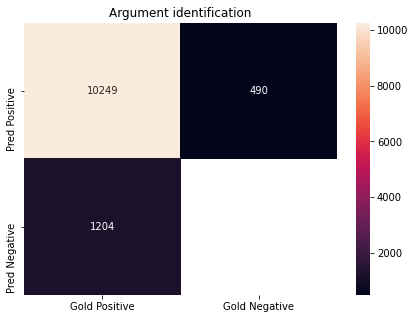

In [ ]:
array = [[AI['true_positives'],AI['false_positives']],[AI['false_negatives']]]

# Generate the confusion matrix for Argument Identification task
df_cm = pd.DataFrame(array, index = ["Pred Positive", "Pred Negative"],
                  columns = ["Gold Positive", "Gold Negative"])
plt.figure(figsize = (7,5))
plt.title("Argument identification")
sn.heatmap(df_cm, annot=True, fmt='g')

print ("Precision: ", round(AI['precision'],4))
print ("Recall: ", round(AI['recall'],4))
print ("F1 score: ", round(AI['f1'],4))

### Argument classification

In [ ]:
array = [[AC['true_positives'],AC['false_positives']],[AC['false_negatives']]]

print ("Precision: ", round(AC['precision'],4))
print ("Recall: ", round(AC['recall'],4))
print ("F1 score: ", round(AC['f1'],4))

Precision:  0.8911
Recall:  0.8356
F1 score:  0.8625
